In [22]:
import osmnx as ox
import networkx as nx
from matplotlib import pyplot as plt
import geopandas as gpd


In [76]:
place_name = "Uniontown, Alabama, USA"
G = ox.graph_from_place(place_name, network_type='drive')
# G = ox.elevation.add_node_elevations_google(G, api_key='')
G.graph.clear()
for u, v, data in G.edges(data=True):
    data.pop('geometry', None)  # Remove the attribute if it exists


ox.save_graphml(G, '../network_construction/road_net_2.graphml')

Number of nodes: 199
Number of edges: 506


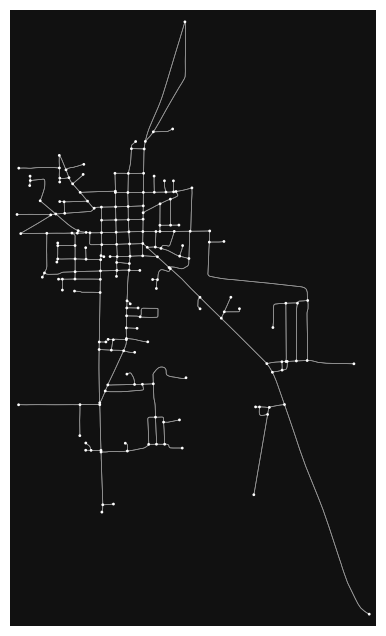

In [5]:
# Print some basic statistics about the graph
print(f"Number of nodes: {len(G.nodes)}")
print(f"Number of edges: {len(G.edges)}")

# Plot the graph
fig, ax = ox.plot_graph(G, node_size=4, edge_linewidth=0.5)

In [8]:
# Download building footprints
buildings = ox.geometries_from_place(place_name, tags={'building': True})

# Convert buildings to a GeoDataFrame
buildings_gdf = gpd.GeoDataFrame(buildings)

C:\Users\mbans\AppData\Local\Temp\ipykernel_14172\1149224087.py:2: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = ox.geometries_from_place(place_name, tags={'building': True})


In [9]:
# Ensure 'osmid' is included in the GeoDataFrame
if 'osmid' not in buildings_gdf.columns:
    buildings_gdf['osmid'] = buildings_gdf.index

In [18]:
# Add buildings as nodes to the graph
for _, building in buildings_gdf.iterrows():
    # Get the centroid of the building
    centroid = building['geometry'].centroid
    # Add the building as a node to the graph
    # G.add_node(building['osmid'], x=centroid.x, y=centroid.y, building=building['building'])
    G.add_node(building['osmid'], x=centroid.x, y=centroid.y)


In [ ]:
# Print some basic statistics about the graph
print(f"Number of nodes: {len(G.nodes)}")
print(f"Number of edges: {len(G.edges)}")

# Plot the graph with buildings
fig, ax = ox.plot_graph(G, node_size=1, edge_linewidth=0.5, show=False, close=False)
buildings_gdf.plot(ax=ax, color='red', markersize=5)